In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
match_data = pd.read_excel('partitaBot1.xlsx')
pd.read_csv('grouptestGroupby.csv', sep=';', names=['num_actions', 'game_time'])

,num_actions,game_time
0,12,202688
1,0,212688
2,1,222688
3,2,232688
4,4,242688
...,...,...
83,7,1032688
84,7,1042688
85,7,1052688
86,2,1062688


In [3]:
match_data = match_data[match_data['game.time']>10]

In [5]:
match_data

,partita 1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,game.time,network.acks_received,network.acks_sent,network.bytes_received,network.bytes_sent,network.messages_received,network.messages_sent,network.packets_acked,network.packets_received,network.packets_sent,network.processing_time,stats.duration
15,NaN,NaN,NaN,NaN,NaN,15.829947,68,102,14447,5680,314,84,68,170,172,0.004856,10.0057
16,NaN,NaN,NaN,NaN,NaN,25.840860,94,116,15040,6792,358,101,94,210,208,0.005727,10.0108
17,NaN,NaN,NaN,NaN,NaN,35.851471,103,118,14724,7390,338,115,103,221,222,0.006042,10.0109
18,NaN,NaN,NaN,NaN,NaN,45.862625,82,99,12148,6199,309,97,82,181,182,0.00534,10.0108
19,NaN,NaN,NaN,NaN,NaN,55.873158,81,107,10697,6173,339,89,81,188,188,0.005151,10.0108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,NaN,NaN,NaN,NaN,NaN,926.735901,222,337,82223,18667,2241,297,222,559,559,0.01739,10.0109
107,NaN,NaN,NaN,NaN,NaN,936.746521,210,337,84927,18520,2280,322,210,547,548,0.017042,10.0108
108,NaN,NaN,NaN,NaN,NaN,946.756348,241,362,97370,21281,2617,388,241,603,604,0.019137,10.0108
109,NaN,NaN,NaN,NaN,NaN,956.758423,206,343,83148,19878,2274,367,206,549,547,0.016286,10.0024


In [6]:
match_data.sort_values('network.bytes_sent', ascending=False).head()

,partita 1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,game.time,network.acks_received,network.acks_sent,network.bytes_received,network.bytes_sent,network.messages_received,network.messages_sent,network.packets_acked,network.packets_received,network.packets_sent,network.processing_time,stats.duration
47,NaN,NaN,NaN,NaN,NaN,336.137146,241,322,75936,52877,2307,316,241,563,563,0.017176,10.0067
79,NaN,NaN,NaN,NaN,NaN,656.455872,230,379,113849,23308,3802,420,230,609,609,0.020386,10.011
61,NaN,NaN,NaN,NaN,NaN,476.260742,260,349,89994,23209,2899,416,260,609,609,0.021698,10.0122
92,NaN,NaN,NaN,NaN,NaN,786.584778,254,362,96357,22080,2855,367,254,616,617,0.021345,10.0159
91,NaN,NaN,NaN,NaN,NaN,776.568970,245,376,100947,21353,3337,367,246,621,621,0.020418,10.008


# Analysis

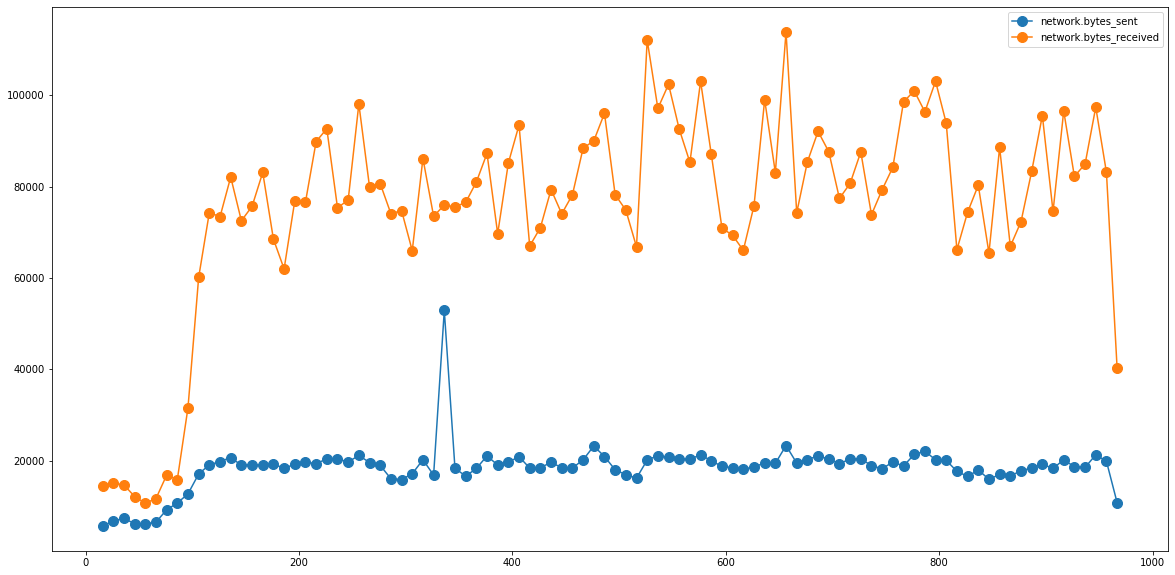

In [7]:
plt.figure(figsize=(20,10))
plt.plot(match_data['game.time'], match_data['network.bytes_sent'],'.-', ms =20, label='network.bytes_sent')
plt.plot(match_data['game.time'], match_data['network.bytes_received'],'.-',ms=20, label='network.bytes_received')
plt.legend()

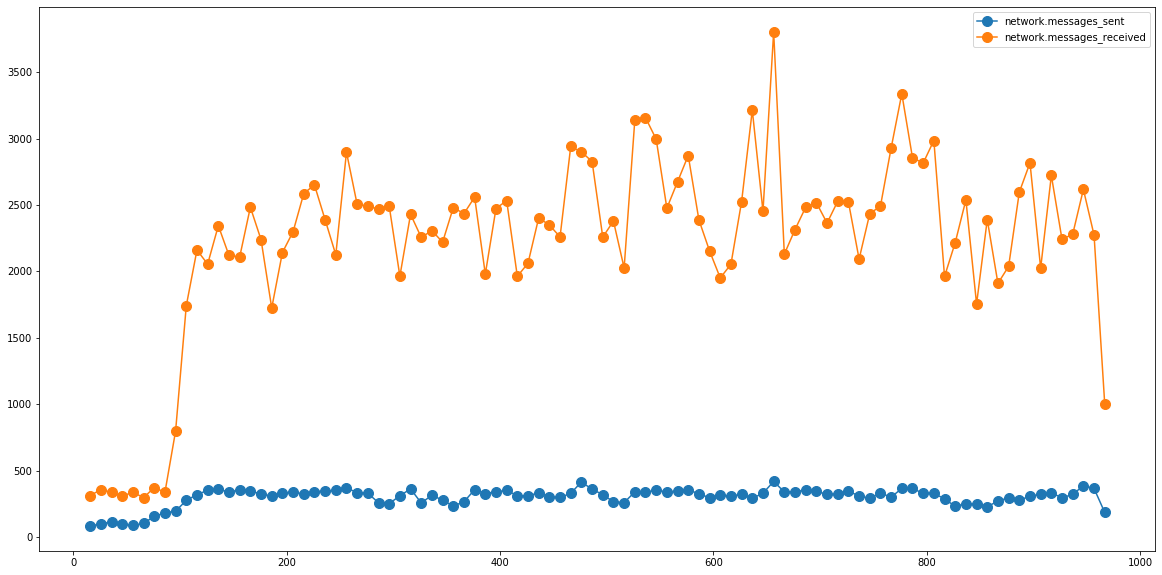

In [8]:
plt.figure(figsize=(20,10))
plt.plot(match_data['game.time'], match_data['network.messages_sent'],'.-', ms =20, label='network.messages_sent')
plt.plot(match_data['game.time'], match_data['network.messages_received'],'.-',ms=20, label='network.messages_received')
plt.legend()

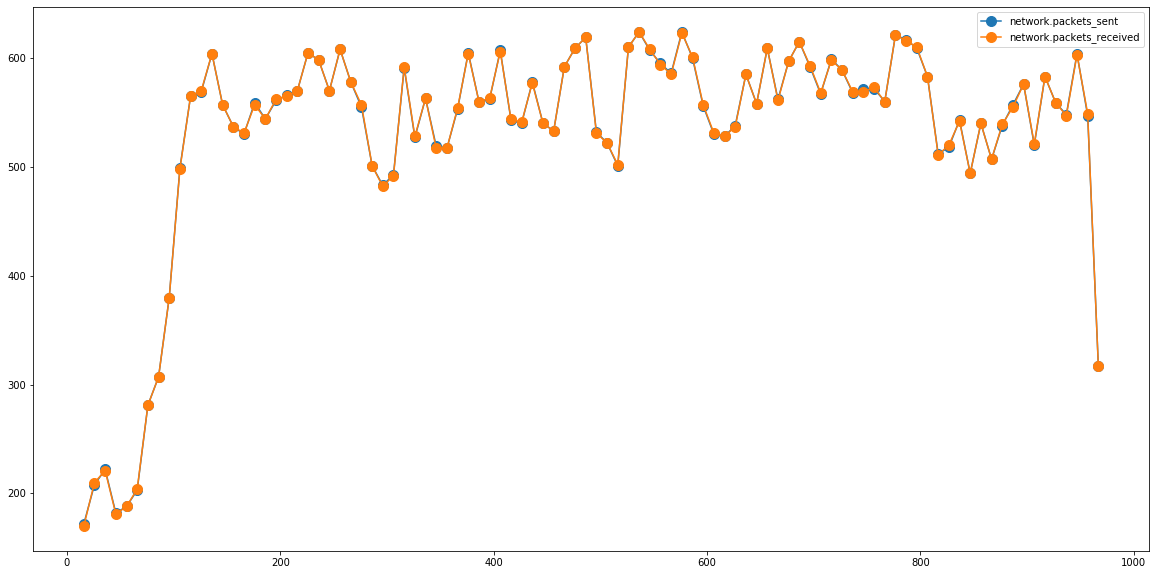

In [9]:
plt.figure(figsize=(20,10))
plt.plot(match_data['game.time'], match_data['network.packets_sent'],'.-', ms =20, label='network.packets_sent')
plt.plot(match_data['game.time'], match_data['network.packets_received'],'.-',ms=20, label='network.packets_received')
plt.legend()

In [10]:
def plot_stats(data, title = None):
    fig, (ax_byte, ax_pkt, ax_msg) =  plt.subplots(nrows=3,figsize=(16,3*3))
    ax_byte.plot(data['game.time'], data['network.bytes_sent'],'.-', ms =20, label='network.bytes_sent')
    ax_byte.plot(data['game.time'], data['network.bytes_received'],'.-',ms=20, label='network.bytes_received')
    ax_byte.legend()


    #plt.figure(figsize=(16,5))
    ax_pkt.plot(data['game.time'], data['network.packets_sent'],'.-', ms =20, label='network.packets_sent')
    ax_pkt.plot(data['game.time'], data['network.packets_received'],'.-',ms=20, label='network.packets_received')
    ax_pkt.legend()

    ax_msg.plot(data['game.time'], data['network.messages_sent'],'.-', ms =20, label='network.messages_sent')
    ax_msg.plot(data['game.time'], data['network.messages_received'],'.-',ms=20, label='network.messages_received')
    ax_msg.legend()

    for ax in (ax_byte, ax_pkt, ax_msg):
        ymin, ymax = ax.get_ylim()
        ax.vlines(x=data.loc[data['network.bytes_sent'].argmax()]['game.time'], ymin=ymin,ymax=ymax)
        ax.set_xlim(0,data['game.time'].max())
        
    fig.suptitle(title)

In [11]:
def plot_comparision(*datasets):
    plt.figure(figsize=(16,5))
    plt.title('RTT')
    for data in datasets:
        plt.plot(data['game.time'], data['network.rtt_average'],'.-', ms=15)
        
    plt.figure(figsize=(16,5))
    plt.title('NET Proc time')
    for i, data in zip(range(0,len(datasets)*2, 2),  datasets):
        plt.plot(data['game.time'], data['network.rtt_average'],'.-', ms=15, color= cm.tab20(i), label= f"rtt_average {int(i/2)+1}" )
        plt.plot(data['game.time'], data['network.processing_time'],'.-', ms=15, color= cm.tab20(i+1), label= f"processing_time {int(i/2)+1}")
    plt.legend()    
        

In [12]:
d = {'num':1, 'x':40}

"{num} {num} {x} {x}".format(**d)

'1 1 40 40'

In [13]:
num=1
f"{num} {num}"

'1 1'

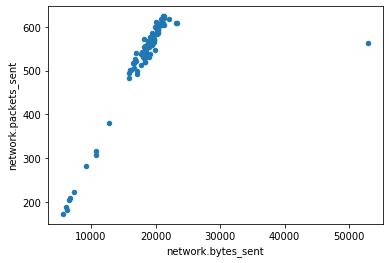

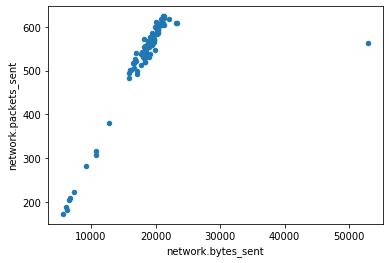

In [14]:
match_data.plot(x='network.bytes_sent', y ='network.packets_sent' , kind='scatter')
match_data.plot(x='network.bytes_sent', y ='network.packets_sent' , kind='scatter')

In [15]:
x = match_data.set_index('game.time')#.loc[15]
x.loc[15.829947]

partita 1                         NaN
Unnamed: 1                        NaN
Unnamed: 2                        NaN
Unnamed: 3                        NaN
Unnamed: 4                        NaN
network.acks_received              68
network.acks_sent                 102
network.bytes_received          14447
network.bytes_sent               5680
network.messages_received         314
network.messages_sent              84
network.packets_acked              68
network.packets_received          170
network.packets_sent              172
network.processing_time      0.004856
stats.duration                10.0057
Name: 15.829947, dtype: object

In [20]:
#match_data['network.bytes_sent'].argmax()

In [17]:
match_data_aram1 = pd.read_csv('partitaAram1.csv')[:-1]
#match_data_aram1.sort_values('network.bytes_sent', ascending=False)

In [18]:
match_data_aram1.columns

Index(['game.frametime_average', 'game.frametime_variance', 'game.time',
       'network.acks_received', 'network.acks_sent', 'network.adapter',
       'network.bytes_received', 'network.bytes_sent', 'network.connects',
       'network.connects_received', 'network.connects_rejected',
       'network.connects_sent', 'network.disconnects',
       'network.messages_limited', 'network.messages_received',
       'network.messages_redundant', 'network.messages_resent',
       'network.messages_sent', 'network.never_connected',
       'network.packets_acked', 'network.packets_limited',
       'network.packets_lost', 'network.packets_outofseq',
       'network.packets_received', 'network.packets_sent',
       'network.peer_address', 'network.peer_port', 'network.processing_time',
       'network.reconnects', 'network.reconnects_rejected',
       'network.rtt_average', 'network.rtt_jitter', 'network.status',
       'player.id', 'stats.duration', 'stats.version'],
      dtype='object')

In [21]:
match_data_aram2 = pd.read_csv('2020-06-09T20-59-45_netstats.csv')[:-1]

In [22]:
plt.figure(figsize=(16,5))
plt.plot(match_data_aram1['network.rtt_average'] network.rtt_average)


SyntaxError: invalid syntax (<ipython-input-22-cae91253e05e>, line 2)

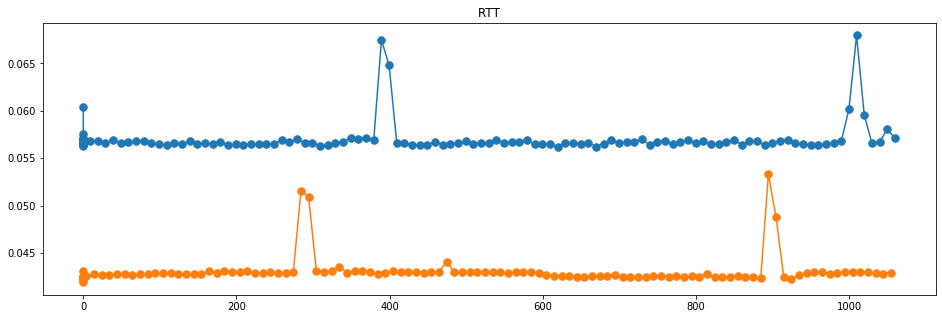

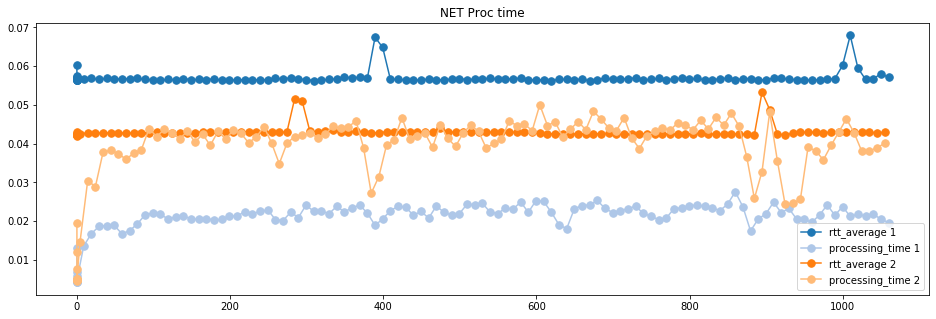

In [120]:
plot_comparision(match_data_aram1,match_data_aram2)

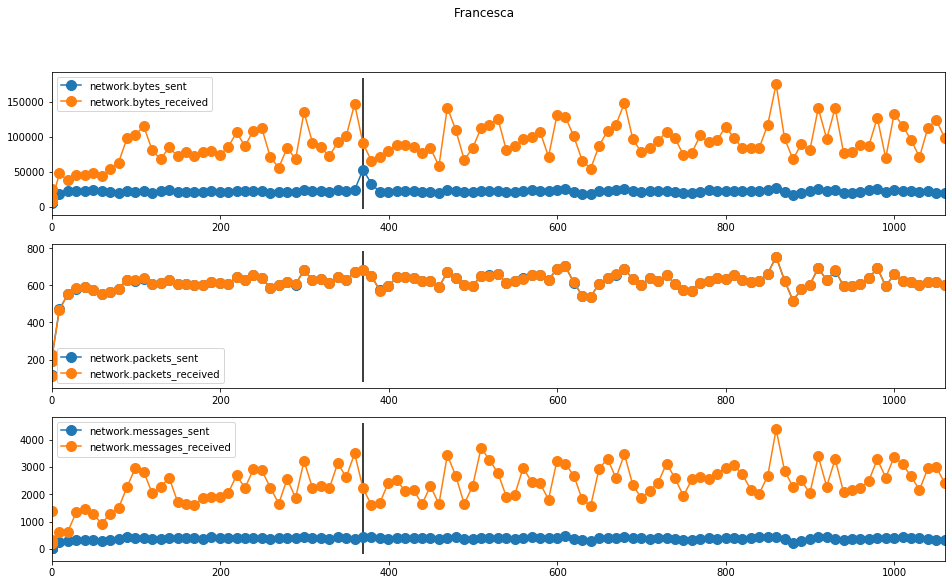

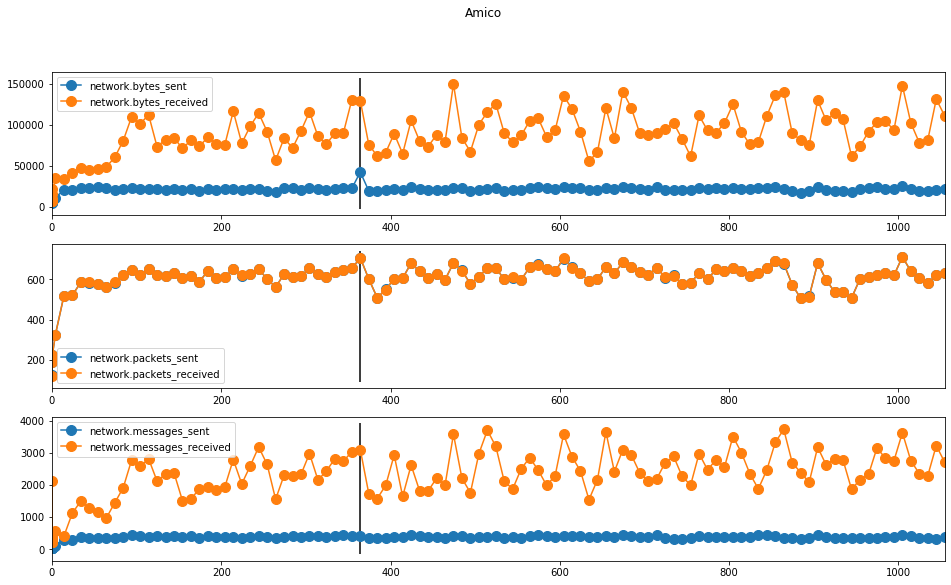

In [23]:
plot_stats(match_data_aram1, 'Francesca')
plot_stats(match_data_aram2, 'Amico')